In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('household_power_consumption.txt', delimiter=';', low_memory=False, header=0, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'], na_values='?')

In [3]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
df.shape

(2075259, 7)

In [5]:
df.replace("?", np.nan, inplace=True)

In [6]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [7]:

df = df.fillna(df.mean())
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

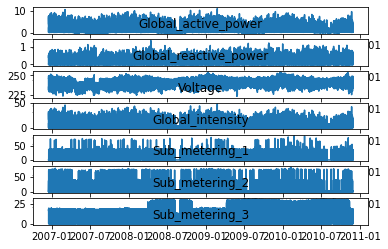

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [8]:
for i in range(len(df.columns)):
    plt.subplot(len(df.columns), 1, i+1)
    name = df.columns[i]
    plt.plot(df[name])
    plt.title(name, y=0)
plt.show()
plt.figure(figsize=(10,6))

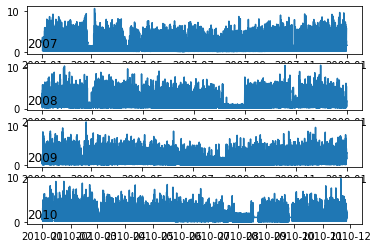

In [9]:
years = ['2007','2008','2009','2010']
plt.figure()
for i in range(len(years)):
    ax = plt.subplot(len(years), 1, i+1)
    year = years[i]
    result = df[str(year)]
    plt.plot(result['Global_active_power'])
    plt.title(str(year), y=0, loc='left')
plt.show()

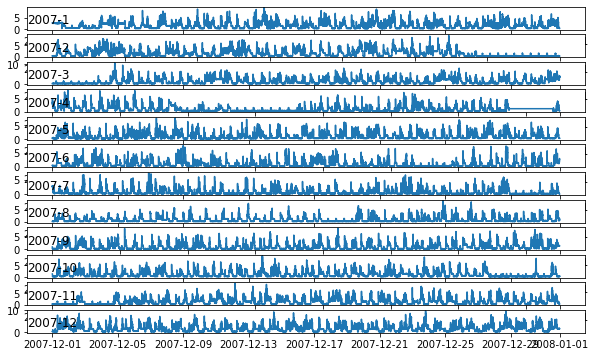

<Figure size 432x288 with 0 Axes>

In [10]:
months = [x for x in range(1, 13)]
plt.figure(figsize=(10,6))
for i in range(len(months)):
    ax = plt.subplot(len(months), 1, i+1)
    month= '2007-' + str(months[i])
    result = df[month]
    plt.plot(result['Global_active_power'])
    plt.title(month, y=0, loc='left')
plt.show()
plt.tight_layout()

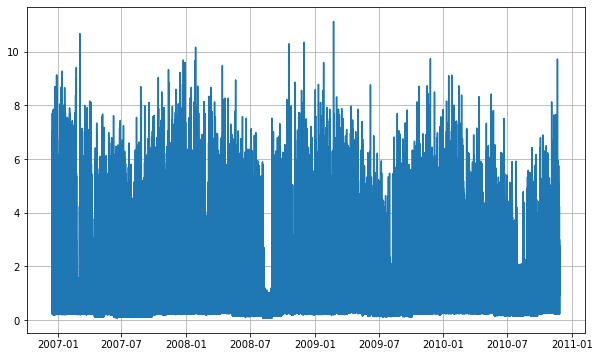

In [11]:
plt.figure(figsize=(10,6))
plt.plot(df.Global_active_power)
plt.grid()

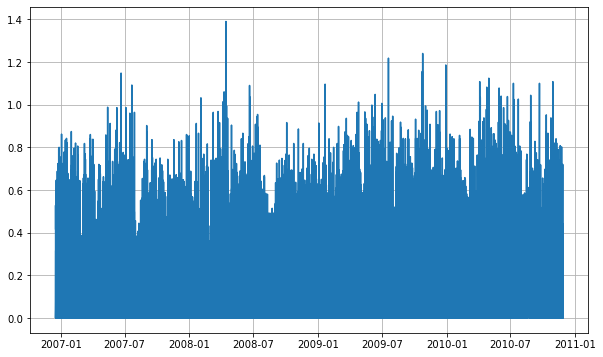

In [12]:
plt.figure(figsize=(10,6))
plt.plot(df.Global_reactive_power)
plt.grid()

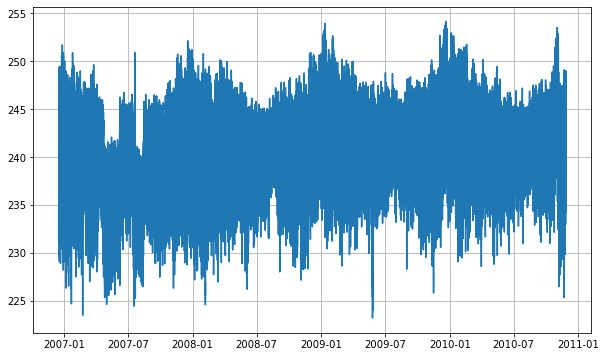

In [13]:
plt.figure(figsize=(10,6))
plt.plot(df.Voltage)
plt.grid()

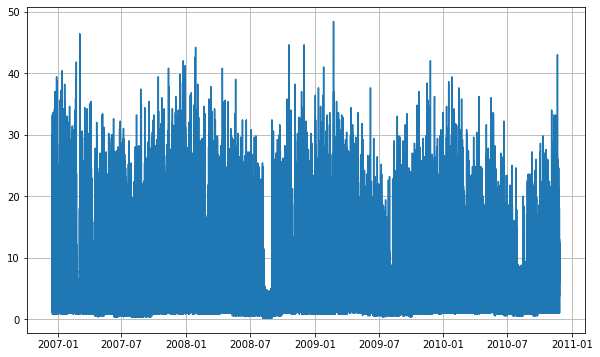

In [14]:
plt.figure(figsize=(10,6))
plt.plot(df.Global_intensity)
plt.grid()

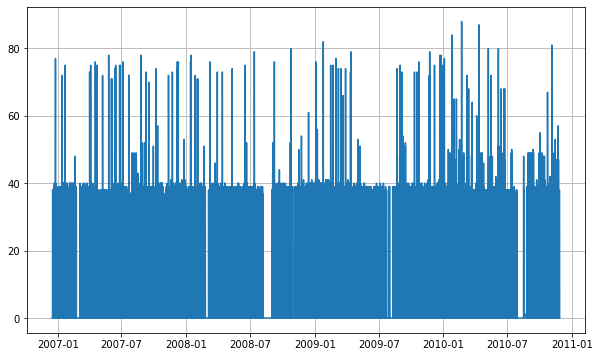

In [15]:
plt.figure(figsize=(10,6))
plt.plot(df.Sub_metering_1)
plt.grid()

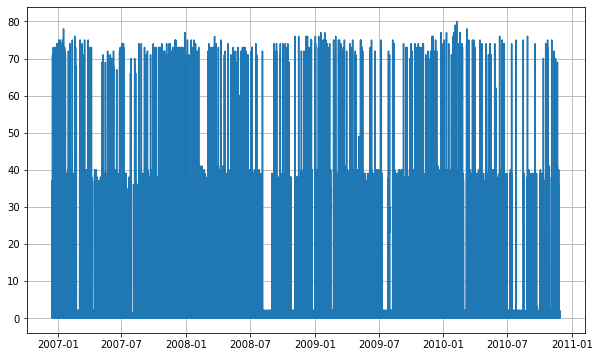

In [16]:
plt.figure(figsize=(10,6))
plt.plot(df.Sub_metering_2)
plt.grid()

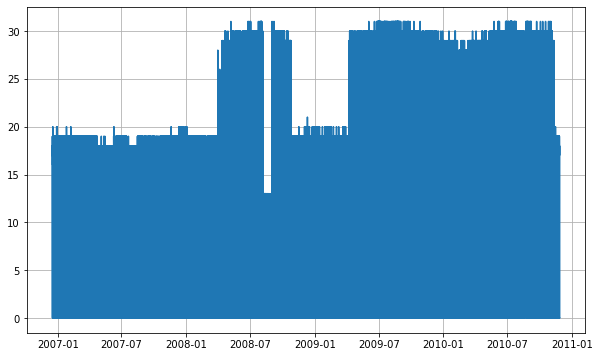

In [17]:
plt.figure(figsize=(10,6))
plt.plot(df.Sub_metering_3)
plt.grid()

In [18]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

<ipython-input-19-dd25b4d66d6d>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_series = sm.tsa.seasonal_decompose(df['Voltage'], model='additive', freq=(60*24*30))


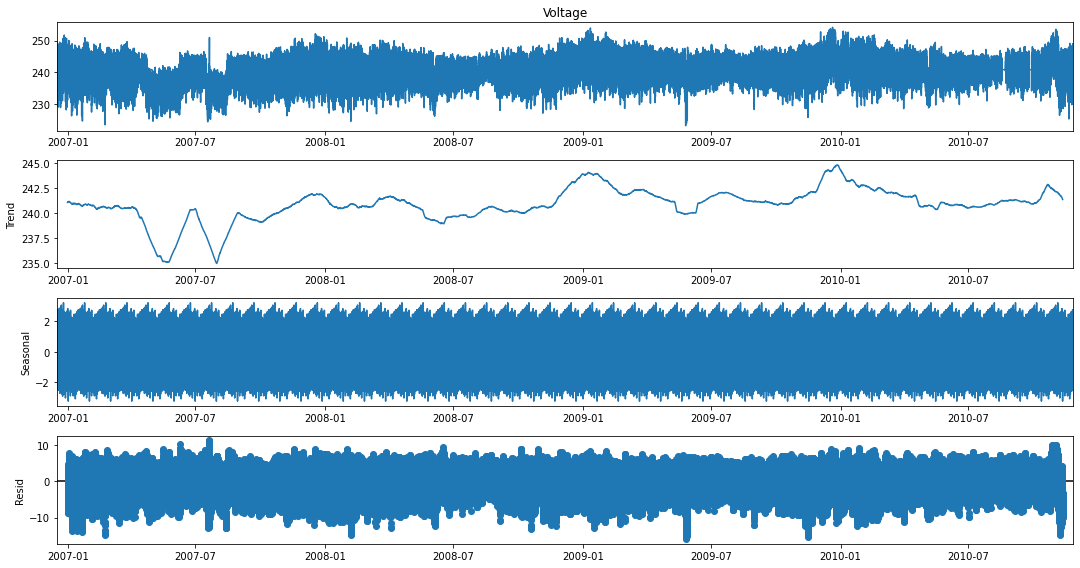

In [19]:
decompose_series = sm.tsa.seasonal_decompose(df['Voltage'], model='additive', freq=(60*24*30))
decompose_series.plot()
plt.show()

In [20]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [21]:
df_daily = df.resample('D').sum()
df_daily.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [22]:
df_monthly = df.resample('M').mean()
df_monthly.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-31,1.901148,0.131384,241.441016,8.029338,1.248613,2.214821,7.409385
2007-01-31,1.546014,0.132676,240.905098,6.546829,1.264230,1.775909,7.383309
2007-02-28,1.401068,0.113637,240.519406,5.914505,1.180214,1.602346,6.703545
2007-03-31,1.318622,0.114747,240.513476,5.572958,1.361338,2.346848,6.504647
2007-04-30,0.908462,0.119203,239.524112,3.894800,1.070716,1.001190,4.943236


<ipython-input-23-c3bb9b4fd6fd>:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_series = sm.tsa.seasonal_decompose(df['Global_active_power'], model='additive', freq= (60*24*30))


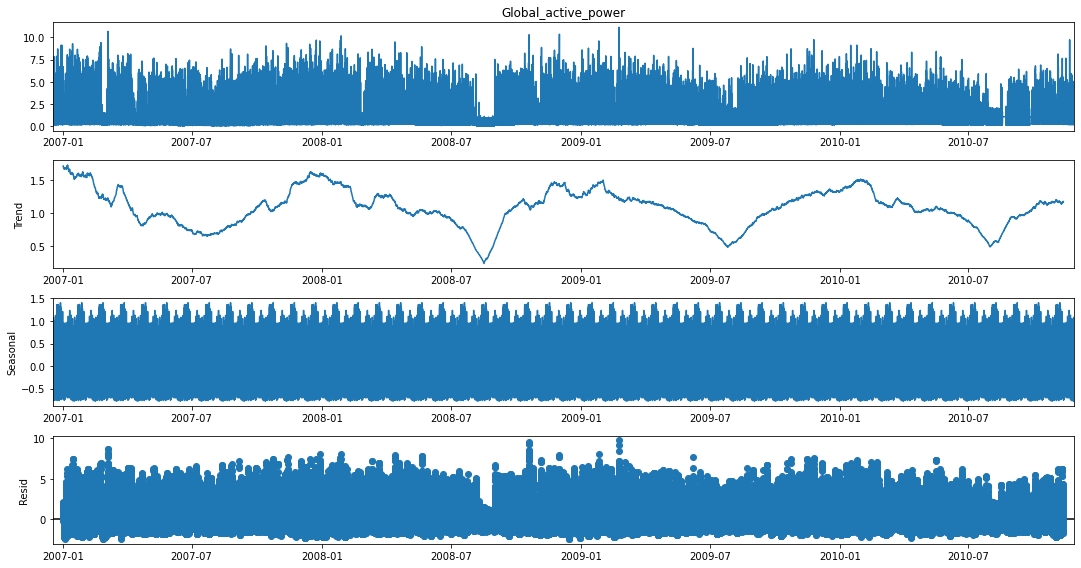

In [23]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 15,8
decompose_series = sm.tsa.seasonal_decompose(df['Global_active_power'], model='additive', freq= (60*24*30))
decompose_series.plot()
plt.show()

In [24]:
from fbprophet import Prophet

In [25]:
!pip install --upgrade plotly

Requirement already up-to-date: plotly in c:\users\aliiu\anaconda3\lib\site-packages (4.11.0)


In [26]:
df_daily.head(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0


In [27]:
df_daily2= df_daily.reset_index()
df_daily2.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [28]:
df_daily2 = df_daily2[['datetime','Global_active_power']]
new_daily_df= df_daily2.rename(columns={"datetime":"ds","Global_active_power":"y"})
model_2 = Prophet()
model_2.fit(new_daily_df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
future = model_2.make_future_dataframe(periods=365, freq='D')
forecast2 = model_2.predict(future)
forecast2.head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1653.764843,1827.454408,2893.149155,1653.764843,1653.764843,700.841388,700.841388,700.841388,214.994159,214.994159,214.994159,485.847229,485.847229,485.847229,0.0,0.0,0.0,2354.606232
1,2006-12-17,1653.579479,1774.205749,2848.116425,1653.579479,1653.579479,682.289265,682.289265,682.289265,181.839106,181.839106,181.839106,500.450159,500.450159,500.450159,0.0,0.0,0.0,2335.868743
2,2006-12-18,1653.394114,1489.808650,2585.494353,1653.394114,1653.394114,384.690448,384.690448,384.690448,-130.487222,-130.487222,-130.487222,515.177670,515.177670,515.177670,0.0,0.0,0.0,2038.084562
3,2006-12-19,1653.208749,1654.915301,2727.879725,1653.208749,1653.208749,499.326118,499.326118,499.326118,-30.320133,-30.320133,-30.320133,529.646250,529.646250,529.646250,0.0,0.0,0.0,2152.534867
4,2006-12-20,1653.023385,1654.445311,2686.629767,1653.023385,1653.023385,531.562125,531.562125,531.562125,-11.912874,-11.912874,-11.912874,543.474999,543.474999,543.474999,0.0,0.0,0.0,2184.585510


In [30]:
forecast2[['ds','yhat','yhat_lower','yhat_upper','trend','trend_lower','trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2006-12-16,2354.606232,1827.454408,2893.149155,1653.764843,1653.764843,1653.764843
1,2006-12-17,2335.868743,1774.205749,2848.116425,1653.579479,1653.579479,1653.579479
2,2006-12-18,2038.084562,1489.808650,2585.494353,1653.394114,1653.394114,1653.394114
3,2006-12-19,2152.534867,1654.915301,2727.879725,1653.208749,1653.208749,1653.208749
4,2006-12-20,2184.585510,1654.445311,2686.629767,1653.023385,1653.023385,1653.023385
...,...,...,...,...,...,...,...
1802,2011-11-22,2045.115251,1510.394563,2598.928555,1612.349793,1604.188580,1621.209892
1803,2011-11-23,2069.270394,1558.189495,2591.726723,1612.420344,1604.224596,1621.324709
1804,2011-11-24,1928.942979,1384.819591,2445.174404,1612.490895,1604.242726,1621.421594
1805,2011-11-25,2015.768674,1486.498939,2542.026045,1612.561447,1604.260857,1621.514163


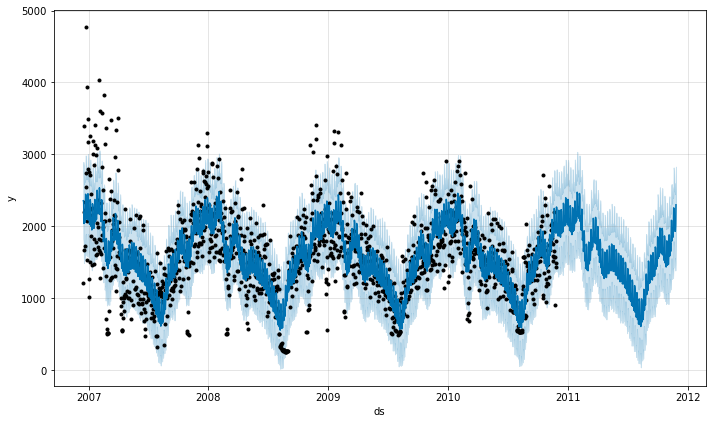

In [31]:
model_2.plot(forecast2)
plt.show()

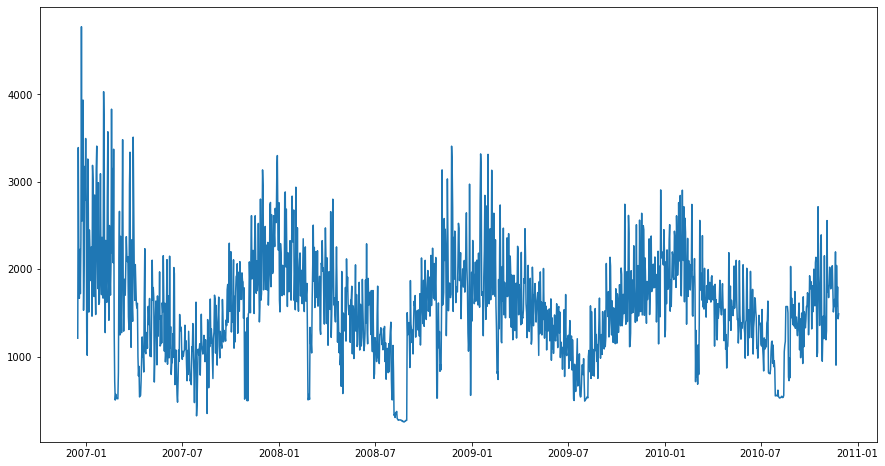

In [32]:
plt.plot(df_daily.Global_active_power)
plt.show()

In [33]:
df['Voltage'].corr(df['Global_active_power'])

-0.39976160962896073

In [34]:
df['Global_active_power'].corr(df['Global_reactive_power'])

0.24701705264406124

In [35]:
df['Global_reactive_power'].corr(df['Global_active_power'])

0.24701705264406126

In [36]:
df_daily.shape

(1442, 7)

In [37]:
df_GAP = df_daily2['Global_active_power']

In [38]:
...
# create test dataset, remove last 12 months
train_df = df_daily2.drop(df_daily2.index[-365:])
print(train_df.tail())

       datetime  Global_active_power
1072 2009-11-22             2450.976
1073 2009-11-23             1471.122
1074 2009-11-24             2128.856
1075 2009-11-25             1980.130
1076 2009-11-26             1599.626


In [39]:
df_daily2.tail(2)

,datetime,Global_active_power
1440,2010-11-25,1431.164
1441,2010-11-26,1488.104


In [40]:
new_train_df= train_df.rename(columns={"datetime":"ds","Global_active_power":"y"})

In [41]:
model = Prophet()
model.fit(new_train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [42]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1437,2010-11-22,2040.487987,1490.657827,2586.044997
1438,2010-11-23,2182.724646,1644.234605,2738.217244
1439,2010-11-24,2193.787401,1661.003370,2755.563875
1440,2010-11-25,2026.384163,1495.381698,2602.451868
1441,2010-11-26,2156.743762,1612.529322,2698.517124


In [43]:

# calculate MAE between expected and predicted values for december
y_true = df_daily2['Global_active_power'][-365:].values
y_pred = forecast['yhat'][-365:].values


In [44]:
MAE = np.mean(np.abs((y_true - y_pred)/y_true))
MAE

0.20900005598598448

In [45]:
y_true.shape

(365,)

In [46]:
forecast['yhat'].tail()

1437    2040.487987
1438    2182.724646
1439    2193.787401
1440    2026.384163
1441    2156.743762
Name: yhat, dtype: float64

In [47]:
df_daily2['Global_active_power'].tail()

1437    2041.536
1438    1577.536
1439    1796.248
1440    1431.164
1441    1488.104
Name: Global_active_power, dtype: float64

In [48]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
round(rmse, 3)

375.082

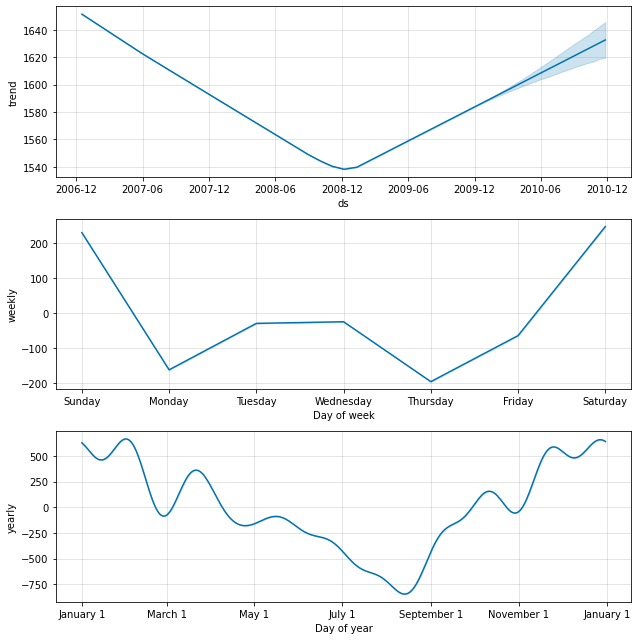

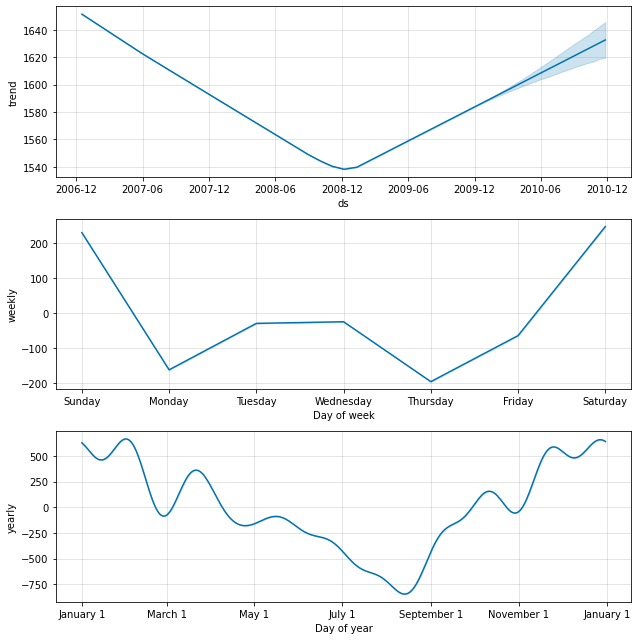

In [49]:
model.plot_components(forecast)